**Aim**: Build a gradient boosting model with 3 decision tree weak learner & implement the final prediction.
    
**Steps:** 
1. Create a primary model(avg of target column) 
2. Now, calculate the pseudo residual 
3. Create a secondary model with independent column & dependent column as pseudo residual of primary model. 
4. Now make prediction using secondary model & find the pseudo residuals secondary model. 
5. Make final prediction as, final_pred = m1_pred + m2_pred. To reduce the overfitting multiply secondary model with learning rate factor(0.1) 


In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor, plot_tree 
df = pd.DataFrame({ 
'age': [20, 23, 35, 45, 28], 
'exp': [1.0, 1.5, 3.0, 5.0, 2.0], 
'sal': [25, 30, 45, 60, 35] 
}) 
df 

,age,exp,sal
0,20,1.0,25
1,23,1.5,30
2,35,3.0,45
3,45,5.0,60
4,28,2.0,35


In [2]:
# model1 prediction 
df['m1_pred'] = df.sal.mean()
df['m1_residual'] = df.sal - df.sal.mean() 
df

,age,exp,sal,m1_pred,m1_residual
0,20,1.0,25,39.0,-14.0
1,23,1.5,30,39.0,-9.0
2,35,3.0,45,39.0,6.0
3,45,5.0,60,39.0,21.0
4,28,2.0,35,39.0,-4.0


,age,exp,sal,m1_pred,m1_residual,m2_pred,m2_residual
0,20,1.0,25,39.0,-14.0,37.6,-12.6
1,23,1.5,30,39.0,-9.0,38.1,-8.1
2,35,3.0,45,39.0,6.0,39.6,5.4
3,45,5.0,60,39.0,21.0,41.1,18.9
4,28,2.0,35,39.0,-4.0,38.6,-3.6


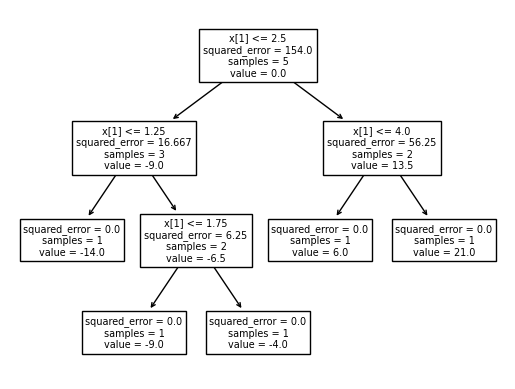

In [3]:
# mode12 prediction 
dt = DecisionTreeRegressor() 
plot_tree(dt.fit(df[['age', 'exp']], df['m1_residual'])) 
df['m2_pred'] = dt.predict(df[['age', 'exp']]) 
df['m2_pred'] = df.m1_pred + (0.1* df.m2_pred) 
df['m2_residual'] =  df.sal - df.m2_pred
df

,age,exp,sal,m1_pred,m1_residual,m2_pred,m2_residual,m3_pred,m3_residual
0,20,1.0,25,39.0,-14.0,37.6,-12.6,36.34,-11.34
1,23,1.5,30,39.0,-9.0,38.1,-8.1,37.29,-7.29
2,35,3.0,45,39.0,6.0,39.6,5.4,40.14,4.86
3,45,5.0,60,39.0,21.0,41.1,18.9,42.99,17.01
4,28,2.0,35,39.0,-4.0,38.6,-3.6,38.24,-3.24


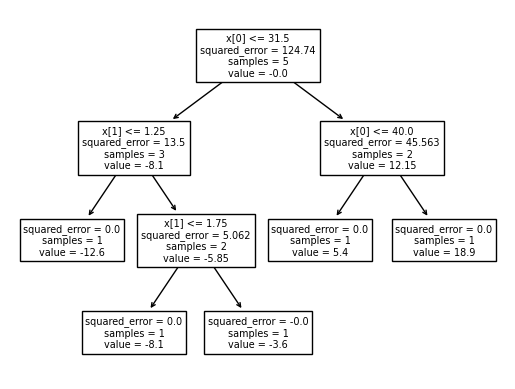

In [4]:
# mode12 prediction 
dt = DecisionTreeRegressor() 
plot_tree(dt.fit(df[['age', 'exp']], df['m2_residual'])) 
df['m3_pred'] = dt.predict(df[['age', 'exp']]) 
df['m3_pred'] = df.m2_pred + (0.1* df.m3_pred) 
df['m3_residual'] =  df.sal - df.m3_pred
df